In [4]:
#pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import plotly.express as px


In [6]:
df = pd.read_csv('/Users/sets.csv')

In [7]:
df.head()

,Set_ID,Name,Year,Theme,Theme_Group,Subtheme,Category,Packaging,Num_Instructions,Availability,Pieces,Minifigures,Owned,Rating,USD_MSRP,Total_Quantity,Current_Price
0,75-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},16.0,NaN,10.0,0.0,NaN,NaN,NaN
1,77-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},20.0,NaN,11.0,0.0,NaN,NaN,NaN
2,077-1,Pre-School Set,1975,Duplo,Pre-school,NaN,Normal,{Not specified},0,{Not specified},21.0,NaN,10.0,0.0,NaN,0.0,NaN
3,78-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},32.0,NaN,8.0,0.0,NaN,NaN,NaN
4,78-3,Basic Set,1975,Samsonite,Vintage,Basic set,Normal,Box,0,{Not specified},330.0,NaN,10.0,0.0,NaN,0.0,NaN


In [8]:
df.tail()

,Set_ID,Name,Year,Theme,Theme_Group,Subtheme,Category,Packaging,Num_Instructions,Availability,Pieces,Minifigures,Owned,Rating,USD_MSRP,Total_Quantity,Current_Price
14931,854242-1,Creeper Key Chain,2023,Gear,Miscellaneous,Key Chains/Minecraft,Gear,Tag,0,LEGO exclusive,NaN,NaN,2.0,0.0,5.99,NaN,NaN
14932,854243-1,Steve Key Chain,2023,Gear,Miscellaneous,Key Chains/Minecraft,Gear,Tag,0,LEGO exclusive,NaN,NaN,2.0,0.0,5.99,NaN,NaN
14933,854244-1,Piglin Key Chain,2023,Gear,Miscellaneous,Key Chains/Minecraft,Gear,Tag,0,LEGO exclusive,NaN,NaN,2.0,0.0,5.99,NaN,NaN
14934,854245-1,Fennec Shand Key Chain,2023,Gear,Miscellaneous,Key Chains/Star Wars,Gear,Tag,0,LEGO exclusive,NaN,NaN,88.0,0.0,5.99,NaN,NaN
14935,854246-1,Scout Trooper Key Chain,2023,Gear,Miscellaneous,Key Chains/Star Wars,Gear,Tag,0,LEGO exclusive,NaN,NaN,107.0,0.0,5.99,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14936 entries, 0 to 14935
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Set_ID            14936 non-null  object 
 1   Name              14936 non-null  object 
 2   Year              14936 non-null  int64  
 3   Theme             14936 non-null  object 
 4   Theme_Group       14915 non-null  object 
 5   Subtheme          11495 non-null  object 
 6   Category          14936 non-null  object 
 7   Packaging         14936 non-null  object 
 8   Num_Instructions  14936 non-null  int64  
 9   Availability      14936 non-null  object 
 10  Pieces            13133 non-null  float64
 11  Minifigures       7686 non-null   float64
 12  Owned             14771 non-null  float64
 13  Rating            14936 non-null  float64
 14  USD_MSRP          5837 non-null   float64
 15  Total_Quantity    12276 non-null  float64
 16  Current_Price     5442 non-null   float6

In [11]:
df_lego = df.copy()

In [12]:
df_lego.describe()

,Year,Num_Instructions,Pieces,Minifigures,Owned,Rating,USD_MSRP,Total_Quantity,Current_Price
count,14936.000000,14936.000000,13133.000000,7686.000000,14771.000000,14936.000000,5837.000000,12276.000000,5442.000000
mean,2006.750736,1.196036,237.935734,2.709862,2045.236951,1.826627,39.967050,4.708618,90.164663
std,11.524612,2.087763,473.090631,2.955427,2972.330218,1.950909,55.006213,20.995961,193.452605
min,1975.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.490000,0.000000,0.050000
25%,2000.000000,0.000000,25.000000,1.000000,90.000000,0.000000,9.990000,0.000000,15.000000
50%,2009.000000,0.000000,81.000000,2.000000,744.000000,0.000000,19.990000,0.000000,36.000000
75%,2016.000000,2.000000,262.000000,3.000000,2828.500000,3.900000,49.990000,3.000000,92.000000
max,2023.000000,48.000000,11695.000000,80.000000,29429.000000,4.900000,849.990000,1063.000000,5499.990000


In [13]:
# Cleaning Data
# Datatypes look accurate so not changed
# Deleted the columns 'USD_MSRP', 'Total_Quantity','Current_Price','Minifigures'
# Replaces NaN values of 'Subtheme' column to unknown
# Dropped rest of the NaN values from the dataframe
# Replaces {Not Specified} values of 'Availability' column to unknown

In [14]:
df_lego.shape

(14936, 17)

In [15]:
df_lego.isna().sum()

Set_ID                 0
Name                   0
Year                   0
Theme                  0
Theme_Group           21
Subtheme            3441
Category               0
Packaging              0
Num_Instructions       0
Availability           0
Pieces              1803
Minifigures         7250
Owned                165
Rating                 0
USD_MSRP            9099
Total_Quantity      2660
Current_Price       9494
dtype: int64

In [16]:
df_lego['Minifigures'].unique()

array([nan,  5.,  2.,  7.,  8.,  1.,  3.,  4., 14.,  6., 11., 10., 36.,
       80.,  9., 12., 24., 13., 19., 18., 30., 22., 16., 31., 20., 21.,
       33., 15., 32., 28., 17., 26.])

In [17]:
df_lego.drop(['USD_MSRP', 'Total_Quantity','Current_Price','Minifigures'], axis=1,inplace=True)

In [18]:
df_lego['Subtheme'] = df_lego['Subtheme'].replace(np.nan, 'unknown')

In [19]:
df_lego['Availability'] = df_lego['Availability'].replace('{Not specified}', 'unknown')

In [20]:
df_lego.dropna(inplace=True)

In [21]:
df_lego.head()

,Set_ID,Name,Year,Theme,Theme_Group,Subtheme,Category,Packaging,Num_Instructions,Availability,Pieces,Owned,Rating
0,75-1,PreSchool Set,1975,PreSchool,Pre-school,unknown,Normal,{Not specified},0,unknown,16.0,10.0,0.0
1,77-1,PreSchool Set,1975,PreSchool,Pre-school,unknown,Normal,{Not specified},0,unknown,20.0,11.0,0.0
2,077-1,Pre-School Set,1975,Duplo,Pre-school,unknown,Normal,{Not specified},0,unknown,21.0,10.0,0.0
3,78-1,PreSchool Set,1975,PreSchool,Pre-school,unknown,Normal,{Not specified},0,unknown,32.0,8.0,0.0
4,78-3,Basic Set,1975,Samsonite,Vintage,Basic set,Normal,Box,0,unknown,330.0,10.0,0.0


In [22]:
by_year = df_lego.sort_values(by='Year',ascending=False)

In [23]:
by_year

,Set_ID,Name,Year,Theme,Theme_Group,Subtheme,Category,Packaging,Num_Instructions,Availability,Pieces,Owned,Rating
14926,682304-1,Green Goblin,2023,Marvel Super Heroes,Licensed,Magazine Gift,Other,Paper bag,0,Retail - limited,19.0,132.0,0.0
14612,41753-1,Pancake Shop,2023,Friends,Modern day,Park,Normal,Box,0,Retail,157.0,4.0,0.0
14581,40651-1,Australia Postcard,2023,Creator,Model making,Postcard,Normal,Box,2,LEGO exclusive,191.0,1157.0,0.0
14583,41723-1,Donut Shop,2023,Friends,Modern day,Beach,Normal,Box,2,Retail,63.0,355.0,0.0
14584,41724-1,Paisley's House,2023,Friends,Modern day,Houses,Normal,Box,6,Retail,185.0,45.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,516-1,Bricks and half bricks,1975,Duplo,Pre-school,unknown,Normal,Box,0,Promotional,20.0,17.0,0.0
27,490-1,Mobile Crane,1975,LEGOLAND,Vintage,unknown,Normal,{Not specified},0,unknown,46.0,383.0,0.0
26,480-1,Rescue Helicopter,1975,LEGOLAND,Vintage,unknown,Normal,{Not specified},0,unknown,62.0,410.0,0.0
25,430-1,Biplane,1975,LEGOLAND,Vintage,unknown,Normal,{Not specified},0,unknown,18.0,454.0,4.0


In [24]:
df_lego['Year'].unique()

array([1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021, 2022, 2023])

In [169]:
period20 = df_lego[df['Year']>=2000]

/var/folders/bw/3xp47zh90w71zwlw1989kx_40000gn/T/ipykernel_14314/180999577.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  period20 = df_lego[df['Year']>=2000]


In [170]:
period20.head(10).sort_values(by='Year',ascending=True)

,Set_ID,Name,Year,Theme,Theme_Group,Subtheme,Category,Packaging,Num_Instructions,Availability,Pieces,Owned,Rating
3608,1086-1,Bulk Bucket,2000,Duplo,Pre-school,unknown,Normal,Bucket,0,Retail,48.0,31.0,0.0
3609,1177-1,Santa's Truck,2000,Town,Modern day,Special,Normal,Polybag,0,Promotional,27.0,105.0,0.0
3610,1196-1,Telekom Race Cyclist,2000,Town,Modern day,Telekom,Normal,Box,0,Promotional,7.0,486.0,3.4
3611,1197-1,Telekom Race Cyclist and Television Motorbike,2000,Town,Modern day,Telekom,Normal,Box,1,Promotional,26.0,420.0,0.0
3612,1198-1,Telekom Race Cyclists and Service Crew,2000,Town,Modern day,Telekom,Normal,Box,1,Promotional,81.0,490.0,0.0
3613,1199-1,Telekom Race Cyclists and Winners' Podium,2000,Town,Modern day,Telekom,Normal,Box,1,Promotional,129.0,376.0,0.0
3614,1261-1,Tea With Bumble Bee,2000,Duplo,Pre-school,Little Forest Friends,Normal,{Not specified},0,Promotional (Airline),10.0,62.0,0.0
3615,1263-1,Easter Bunny,2000,Seasonal,Miscellaneous,Easter,Normal,Polybag,1,Promotional,27.0,309.0,0.0
3616,1264-1,Easter Chicks,2000,Seasonal,Miscellaneous,Easter,Normal,Polybag,1,Promotional,26.0,223.0,0.0
3617,1272-1,Blue Racer,2000,Town,Modern day,Race,Normal,Box,0,Promotional,23.0,357.0,0.0


In [27]:
df_lego['Category'].unique()

array(['Normal', 'Book', 'Other', 'Collection', 'Extended', 'Random'],
      dtype=object)

In [28]:
# In 2015 maximum Legos were manufactured
# Carried out for year from 2000 and onwards

In [29]:
sector =df_lego.groupby(['Year'])['Category'].agg(['count'])
sector = sector.sort_values(by='Year',ascending=False)


In [30]:
sum(df_lego['Year']==2019)

481

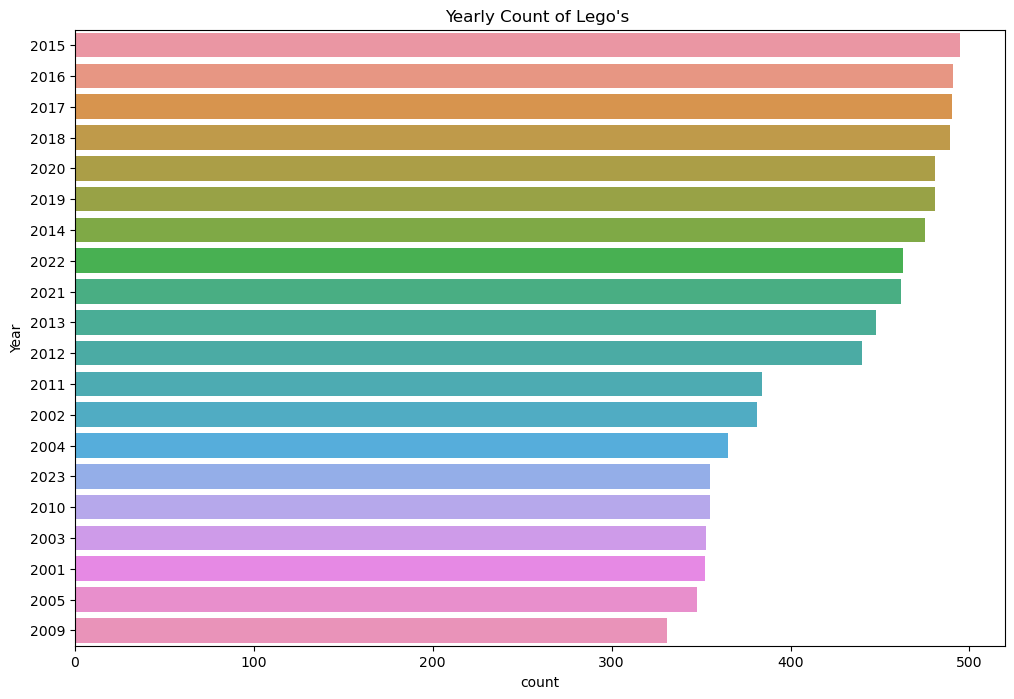

In [171]:
plt.figure(figsize=(12,8))
sns.countplot(y='Year',order=period20['Year'].value_counts().index[0:20],data=period20)
plt.title("Yearly Count of Lego's ");

In [32]:
owned = df_lego.sort_values(by='Owned',ascending=False).head(10)
owned




,Set_ID,Name,Year,Theme,Theme_Group,Subtheme,Category,Packaging,Num_Instructions,Availability,Pieces,Owned,Rating
9939,10243-1,Parisian Restaurant,2014,Creator Expert,Model making,Modular Buildings Collection,Normal,Box,6,LEGO exclusive,2469.0,29429.0,4.6
9991,21108-1,Ghostbusters Ecto-1,2014,Ideas,Miscellaneous,Licensed,Normal,Box,2,Retail - limited,508.0,27851.0,4.4
13388,75267-1,Mandalorian Battle Pack,2020,Star Wars,Licensed,The Mandalorian,Normal,Box,2,Retail,102.0,27799.0,4.1
8723,10220-1,Volkswagen T1 Camper Van,2011,Advanced models,Model making,Vehicles,Normal,Box,10,LEGO exclusive,1334.0,26974.0,4.4
9437,10232-1,Palace Cinema,2013,Creator Expert,Model making,Modular Buildings Collection,Normal,Box,6,LEGO exclusive,2196.0,26341.0,4.2
11436,10255-1,Assembly Square,2017,Creator Expert,Model making,Modular Buildings Collection,Normal,Box,2,LEGO exclusive,4002.0,26028.0,4.4
8721,10218-1,Pet Shop,2011,Advanced models,Model making,Modular Buildings Collection,Normal,Box,4,Retail - limited,2032.0,25758.0,4.3
10436,10246-1,Detective's Office,2015,Creator Expert,Model making,Modular Buildings Collection,Normal,Box,2,LEGO exclusive,2262.0,24706.0,4.5
10902,75099-1,Rey's Speeder,2015,Star Wars,Licensed,The Force Awakens,Normal,Box,2,Retail,193.0,24638.0,3.9
8098,8084-1,Snowtrooper Battle Pack,2010,Star Wars,Licensed,Episode V,Normal,Box,1,unknown,74.0,24340.0,3.9


In [33]:
# Parisian Restaurant has been the most owned Lego set followed by others.

In [95]:
df_lego['Owned'].max()

29429.0

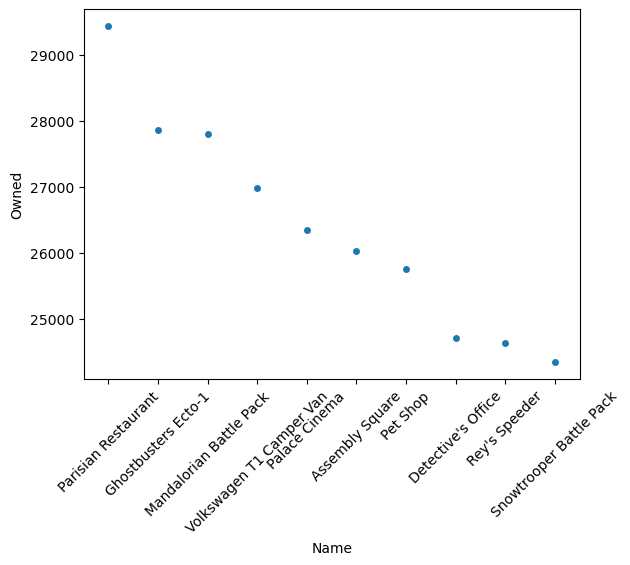

In [34]:
sns.stripplot(x = "Name",
              y = "Owned",
              data = owned);
plt.xticks(rotation=45);

In [35]:
# Maximum Legos are sold under Retail sector

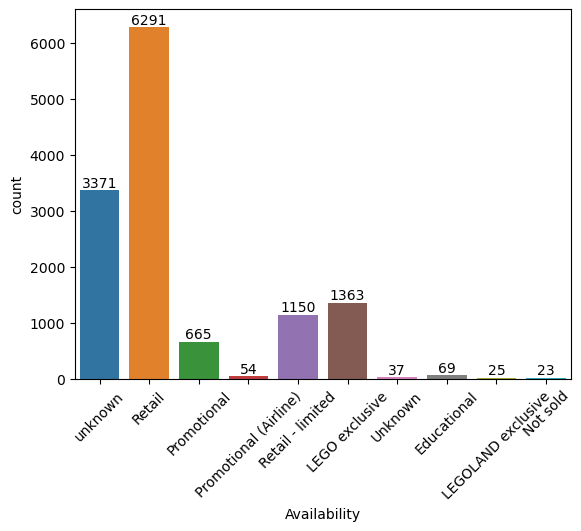

In [36]:
ax=sns.countplot(x='Availability',data=df_lego)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=45);

In [41]:
high_rate = df_lego.sort_values(by='Rating',ascending=False).head(10)
high_rate

,Set_ID,Name,Year,Theme,Theme_Group,Subtheme,Category,Packaging,Num_Instructions,Availability,Pieces,Owned,Rating
7112,7649-1,MT-201 Ultra-Drill Walker,2008,Space,Action/Adventure,Mars Mission,Normal,Box,2,Retail,759.0,857.0,4.9
6753,8924-1,Maxilos and Spinax,2007,Bionicle,Constraction,Warriors,Normal,{Not specified},1,unknown,256.0,1668.0,4.8
13951,10497-1,Galaxy Explorer,2022,Icons,Model making,Space System,Normal,Box,9,Retail,1254.0,9432.0,4.8
9666,45544-1,Education EV3 Core Set,2013,Education,Educational,Mindstorms,Normal,Tub,0,Educational,541.0,776.0,4.8
363,928-1,Space Cruiser And Moonbase,1979,Space,Action/Adventure,Classic,Normal,{Not specified},0,unknown,338.0,2854.0,4.8
3484,5563-1,Racing Truck,1999,Model Team,Model making,unknown,Normal,Box,1,Retail,788.0,623.0,4.8
13944,10305-1,Lion Knights' Castle,2022,Icons,Model making,Castle System,Normal,Box,14,LEGO exclusive,4514.0,6083.0,4.8
7223,8943-1,Axalara T9,2008,Bionicle,Constraction,Battle Vehicles,Normal,{Not specified},3,unknown,693.0,1406.0,4.8
14896,77015-1,Temple of the Golden Idol,2023,Indiana Jones,Licensed,Raiders of the Lost Ark,Normal,Box,2,Retail,1545.0,1415.0,4.8
1756,6542-1,Launch & Load Seaport,1991,Town,Modern day,Boats,Normal,Box,0,Retail,1080.0,2431.0,4.8


In [42]:
# MT-201 Ultra-Drill Walker is the higest rated Lego set of alltime

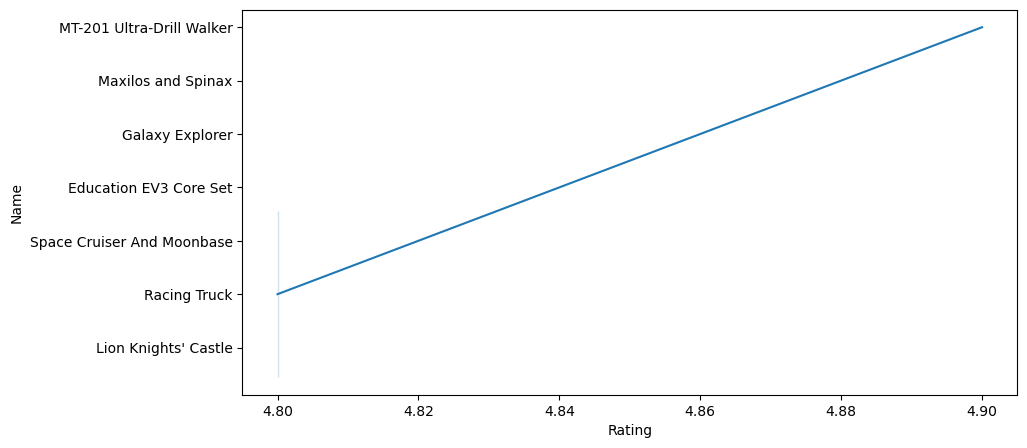

In [43]:
plt.figure(figsize=(10,5))
ax=sns.lineplot(data=high_rate,x='Rating',y='Name')
plt.show()

In [44]:
no_inst =df_lego.groupby(['Name']).agg({'Num_Instructions':'max'}).reset_index().head(10).sort_values(by='Num_Instructions',ascending=False)
no_inst

,Name,Num_Instructions
7,Heartlake City Brick Box,6
0,AT-AT vs. Tauntaun Microfighters,4
2,Blaster Bike,2
4,Build Your Own Birds - Make It Yours,2
6,Fire Rescue Water Scooter,2
8,Imperial Shuttle Tydirium,2
9,Lion Tribe Pack,2
1,Battery Cable Kit,0
3,Bogie Plate,0
5,Discowboy,0


In [47]:
pack=df_lego[df_lego['Year']==2023]
pack

,Set_ID,Name,Year,Theme,Theme_Group,Subtheme,Category,Packaging,Num_Instructions,Availability,Pieces,Owned,Rating
14436,10312-1,Jazz Club,2023,Icons,Model making,Modular Buildings Collection,Normal,Box,9,LEGO exclusive,2899.0,4588.0,4.4
14437,10313-1,Wildflower Bouquet,2023,Icons,Model making,Botanical Collection,Normal,Box,7,Retail,939.0,3502.0,4.3
14438,10314-1,Dried Flower Centrepiece,2023,Icons,Model making,Botanical Collection,Normal,Box,14,Retail,812.0,2349.0,0.0
14440,10316-1,The Lord of the Rings: Rivendell,2023,Icons,Model making,Licensed,Normal,Box,20,LEGO exclusive,6167.0,2104.0,4.7
14441,10317-1,Land Rover Classic Defender 90,2023,Icons,Model making,Vehicles,Normal,Box,7,LEGO exclusive,2336.0,631.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14921,562303-1,Puppy and Doghouse,2023,Friends,Modern day,Magazine gift,Other,Foil pack,0,Retail - limited,25.0,21.0,0.0
14922,662302-1,"Cave Explorer, Creeper and Slime",2023,Minecraft,Licensed,Magazine Gift,Other,Foil pack,0,Retail - limited,30.0,226.0,0.0
14924,662309-1,Knight with Chest and Anvil,2023,Minecraft,Licensed,Magazine Gift,Other,Foil pack,0,Retail - limited,17.0,261.0,0.0
14925,682303-1,Miles Morales,2023,Marvel Super Heroes,Licensed,Magazine Gift,Other,Paper bag,0,Retail - limited,8.0,563.0,0.0


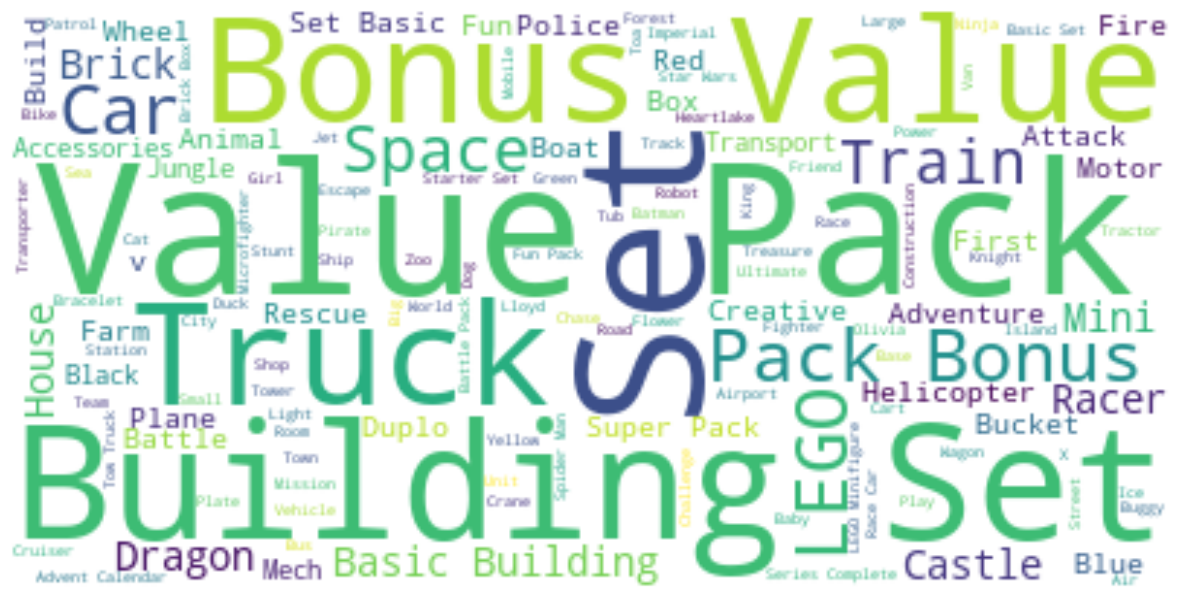

In [152]:
text = df_lego['Name'].values 
text1 = " ".join(i for i in text)
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(str(text1))
plt.figure( figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()



In [ ]:
# Most popular sets for 2022 & 2023 are from Star Wars and Minifigure Collectibles

In [85]:
sub1=df_lego[['Year','Theme','Owned']]
sub1


,Year,Theme,Owned
0,1975,PreSchool,10.0
1,1975,PreSchool,11.0
2,1975,Duplo,10.0
3,1975,PreSchool,8.0
4,1975,Samsonite,10.0
...,...,...,...
14921,2023,Friends,21.0
14922,2023,Minecraft,226.0
14924,2023,Minecraft,261.0
14925,2023,Marvel Super Heroes,563.0


In [96]:
sub2=sub1.groupby(['Year','Theme']).sum().sort_values(by='Year',ascending=False).head(60)


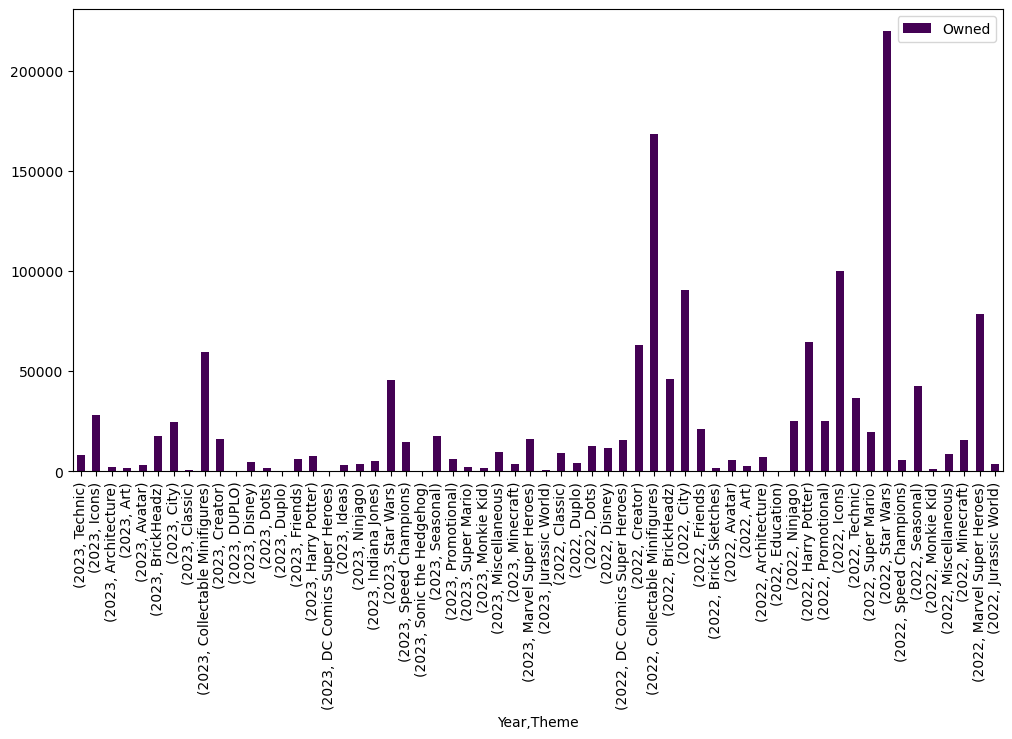

In [94]:
sub2.plot(kind='bar',figsize=(12,6),colormap='viridis');

In [ ]:
# World Map set is huge with maximum number of pieces

In [120]:
maxp = df_lego[['Name','Pieces']].sort_values(by='Pieces',ascending=False).head(20)
maxp

,Name,Pieces
13559,World Map,11695.0
13946,Eiffel Tower,10001.0
13449,Titanic,9090.0
12942,Colosseum,9036.0
11928,Millennium Falcon,7541.0
14380,The Razor Crest,6187.0
14440,The Lord of the Rings: Rivendell,6167.0
14807,NINJAGO City Markets,6163.0
12369,Hogwarts Castle,6020.0
11437,Taj Mahal,5923.0


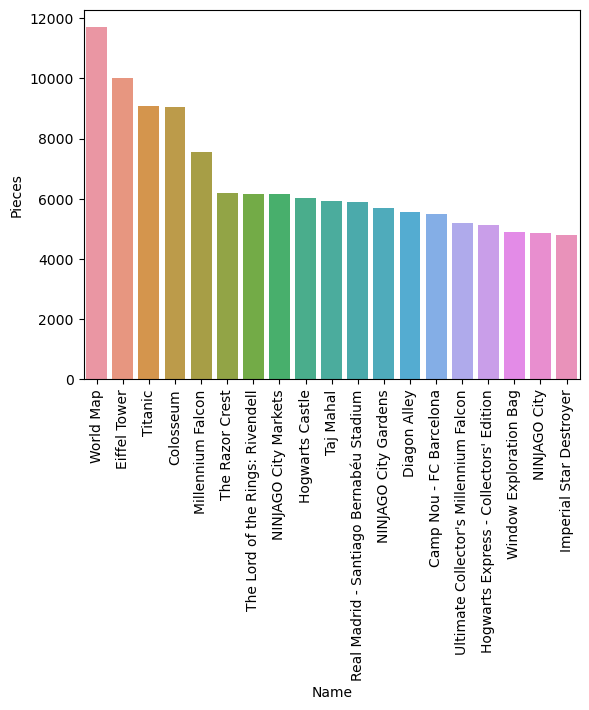

In [128]:
sns.barplot(x='Name',y='Pieces',data=maxp)
plt.xticks(rotation=90);


In [ ]:
# Maximum instruction books are given with the set Colosseum 

In [149]:
ins = df_lego[['Name','Num_Instructions']].sort_values(by='Num_Instructions',ascending=False).head(20)


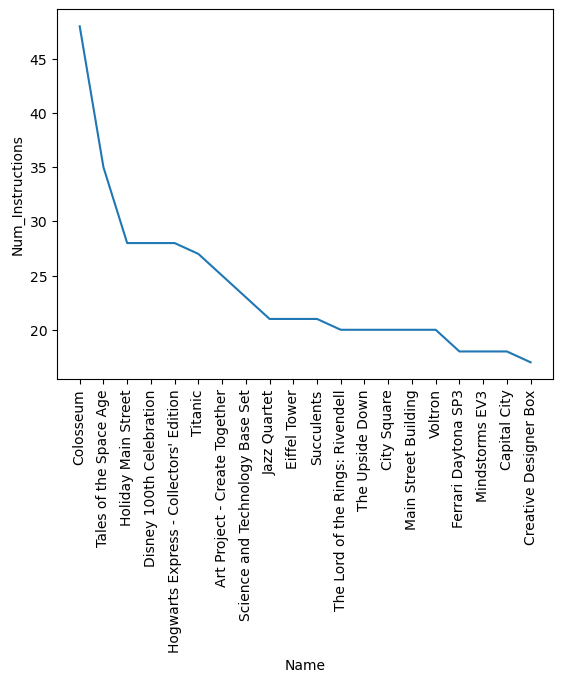

In [150]:
sns.lineplot(x='Name',y='Num_Instructions',data=ins)
plt.xticks(rotation=90);